In [1]:
%pylab inline

import numpy as np
np.random.seed(666)

import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


12 Box2I((602, 194), (629, 221)) 482 2
   FOOTPRINT CENTER: 209 613 44.5836105347
   FOOTPRINT CENTER: 205 617 -38.0424880981
13 Box2I((1076, 262), (1106, 288)) 513 2
   FOOTPRINT CENTER: 276 1092 25.1447162628
   FOOTPRINT CENTER: 271 1097 -14.904384613


/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument footprint does notmatch any arguments of the model function.It will be ignored.
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument rel_weight does notmatch any arguments of the model function.It will be ignored.
/Users/dreiss/lsstsw/miniconda/lib/python2.7/site-packages/lmfit-0.9.2-py2.7.egg/lmfit/model.py:459: UserWarning: The keyword argument psf does notmatch any arguments of the model function.It will be ignored.


16 Box2I((389, 314), (413, 335)) 342 2
   FOOTPRINT CENTER: 327 398 11.7507152557
   FOOTPRINT CENTER: 325 403 -20.7818870544
21 Box2I((769, 403), (792, 425)) 362 2
   FOOTPRINT CENTER: 413 779 28.419128418
   FOOTPRINT CENTER: 411 784 -9.33748054504
30 Box2I((748, 582), (771, 596)) 208 2
   FOOTPRINT CENTER: 589 764 7.68016815186
   FOOTPRINT CENTER: 589 755 6.65393543243
38 Box2I((1361, 714), (1384, 735)) 297 2
   FOOTPRINT CENTER: 723 1374 21.6988105774
   FOOTPRINT CENTER: 726 1370 -12.6033267975
45 Box2I((1333, 783), (1366, 860)) 1326 4
   FOOTPRINT CENTER: 817 1345 13.6779108047
   FOOTPRINT CENTER: 795 1342 12.5293502808
   FOOTPRINT CENTER: 844 1350 10.7063035965
   FOOTPRINT CENTER: 853 1359 6.5689201355
50 Box2I((1579, 885), (1603, 909)) 406 2
   FOOTPRINT CENTER: 896 1591 50.2678184509
   FOOTPRINT CENTER: 899 1587 -23.3645744324
55 Box2I((1416, 1066), (1440, 1089)) 385 2
   FOOTPRINT CENTER: 1075 1432 14.714094162
   FOOTPRINT CENTER: 1078 1427 -34.9424552917
64 Box2I((236,

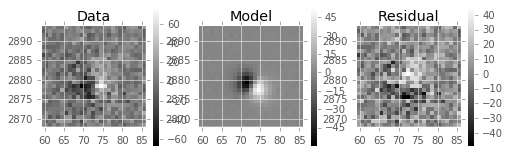

In [2]:
%run -i examples/runDipoleFitterOnThreeImages.py

12 Box2I((602, 194), (629, 221)) 482 2
   FOOTPRINT CENTER: 209 613 44.5836105347
   FOOTPRINT CENTER: 205 617 -38.0424880981
10.1528 2823.1
26.671377574
75295.9556106


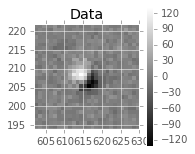

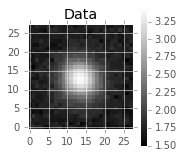

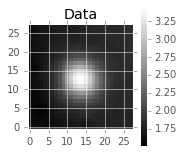

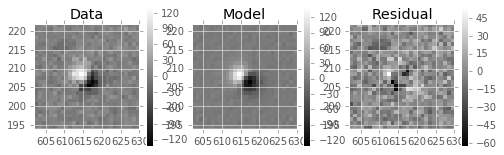

(resultsOutput(psfFitPosCentroidX=615.4604220434666, psfFitPosCentroidY=206.83173957159102, psfFitNegCentroidX=615.5889350081683, psfFitNegCentroidY=206.7357537370216, psfFitPosFlux=70506.81025549276, psfFitNegFlux=-70506.81025549276, psfFitPosFluxSigma=451.17742899957091, psfFitNegFluxSigma=451.17742834011386, psfFitCentroidX=615.5246785258174, psfFitCentroidY=206.7837466543063, psfFitOrientation=143.24408917096744, psfFitSignaltoNoise=221.00327048042601, psfFitChi2=63148.241291280785, psfFitRedChi2=26.905940047414052),
 <lmfit.model.ModelResult at 0x104b99f50>)

In [3]:
i = 115; s = catalog[i]
i = 12; s = catalog[i]
fp = s.getFootprint()
print i, fp.getBBox(), fp.getNpix(), len(fp.getPeaks())
for pk in fp.getPeaks():
    print '   FOOTPRINT CENTER:', pk.getIy(), pk.getIx(), pk.getPeakValue()
    
bbox = fp.getBBox()
subim = afwImage.ImageF(diffim.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.displayImage(subim)
subim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.plt.figure(figsize=(8, 2.5)); dft.DipoleUtils.plt.subplot(1, 3, 1)
dft.DipoleUtils.display2dArray(np.log10(subim.getArray()+50.))
subim = afwImage.ImageF(negImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.plt.figure(figsize=(8, 2.5)); dft.DipoleUtils.plt.subplot(1, 3, 1)
dft.DipoleUtils.display2dArray(np.log10(subim.getArray()+50.))

subim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
subArr = subim.getArray()
print np.median(subArr), np.max(subArr)
psfImg = posImage.getPsf().computeImage()
pkToFlux = np.nansum(psfImg.getArray()) / posImage.getPsf().computePeak()
print pkToFlux
print np.max(subArr) * pkToFlux

result = dft.DipoleFitAlgorithm.fitDipole_new(
    diffim, s, posImage, negImage, rel_weight=0.5, fitBgGradient=False, separateNegParams=False,
    verbose=False, display=True, return_fitObj=True)

result

In [4]:
import warnings
warnings.filterwarnings('ignore')

import lmfit
result0 = result[1]
print result0.fit_report()

[[Model]]
    Model(dipoleFunc)
[[Fit Statistics]]
    # function evals   = 63
    # data points      = 2352
    # variables        = 5
    chi-square         = 63148.241
    reduced chi-square = 26.906
[[Variables]]
    xcenPos:   615.460422 +/- 0.146446 (0.02%) (init= 613)
    ycenPos:   206.831739 +/- 0.161422 (0.08%) (init= 209)
    xcenNeg:   615.588935 +/- 0.009975 (0.00%) (init= 617)
    ycenNeg:   206.735753 +/- 0.010166 (0.00%) (init= 205)
    flux:      70506.8102 +/- 451.1774 (0.64%) (init= 75295.96)
    fluxNeg:   70506.8102 +/- 451.1774 (0.64%)  == 'flux'
    b:         0 (fixed)
    x1:        0 (fixed)
    y1:        0 (fixed)
[[Correlations]] (unreported correlations are <  0.100)



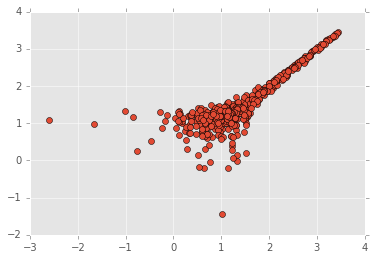

In [5]:
bbox = fp.getBBox()
difSubim = afwImage.ImageF(diffim.getMaskedImage().getImage(), bbox, afwImage.PARENT)
posSubim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
negSubim = afwImage.ImageF(negImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)

plt.plot(np.log10(posSubim.getArray().flatten()), np.log10(negSubim.getArray().flatten()), 'o')

PSFs are identical between images...

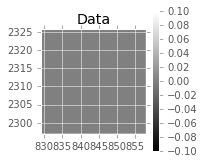

In [6]:
dif_p = diffim.getPsf().computeImage()
#dft.DipoleUtils.displayImage(dif_p)
pos_p = posImage.getPsf().computeImage()
#dft.DipoleUtils.displayImage(pos_p)
neg_p = negImage.getPsf().computeImage()
#dft.DipoleUtils.displayImage(neg_p)

tmp = pos_p.clone()
tmp -= dif_p
dft.DipoleUtils.displayImage(tmp)

Here is a weird case - a bright galaxy with a dipole in the core.

115 Box2I((59, 2868), (85, 2893)) 429 2
   FOOTPRINT CENTER: 2879 75 19.5732498169
   FOOTPRINT CENTER: 2877 69 -19.249174118
127.189 1803.49
26.671377574
48101.6341076


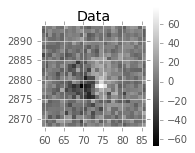

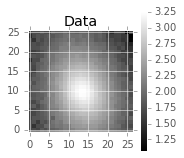

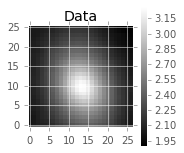

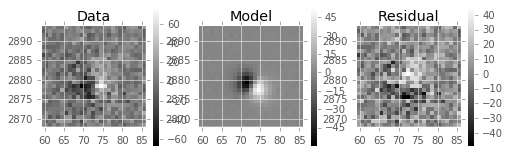

(resultsOutput(psfFitPosCentroidX=72.459190035526, psfFitPosCentroidY=2877.9220855553262, psfFitNegCentroidX=72.40839259127675, psfFitNegCentroidY=2877.9515530777257, psfFitPosFlux=87935.47641236086, psfFitNegFlux=-87935.47641236086, psfFitPosFluxSigma=1494.6027982843088, psfFitNegFluxSigma=1494.6028043221227, psfFitCentroidX=72.43379131340137, psfFitCentroidY=2877.936819316526, psfFitOrientation=-30.117956984705259, psfFitSignaltoNoise=83.205747538854524, psfFitChi2=81945.893123968577, psfFitRedChi2=39.059052966619916),
 <lmfit.model.ModelResult at 0x115ab2390>)

In [7]:
i = 115; s = catalog[i]
#i = 12; s = catalog[i]
fp = s.getFootprint()
print i, fp.getBBox(), fp.getNpix(), len(fp.getPeaks())
for pk in fp.getPeaks():
    print '   FOOTPRINT CENTER:', pk.getIy(), pk.getIx(), pk.getPeakValue()
    
bbox = fp.getBBox()
subim = afwImage.ImageF(diffim.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.displayImage(subim)
subim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.plt.figure(figsize=(8, 2.5)); dft.DipoleUtils.plt.subplot(1, 3, 1)
dft.DipoleUtils.display2dArray(np.log10(subim.getArray()))
subim = afwImage.ImageF(negImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.plt.figure(figsize=(8, 2.5)); dft.DipoleUtils.plt.subplot(1, 3, 1)
dft.DipoleUtils.display2dArray(np.log10(subim.getArray()))

subim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
subArr = subim.getArray()
print np.median(subArr), np.max(subArr)
psfImg = posImage.getPsf().computeImage()
pkToFlux = np.nansum(psfImg.getArray()) / posImage.getPsf().computePeak()
print pkToFlux
print np.max(subArr) * pkToFlux

result = dft.DipoleFitAlgorithm.fitDipole_new(
    diffim, s, posImage, negImage, rel_weight=1., fitBgGradient=True, separateNegParams=False,
    verbose=False, display=True, return_fitObj=True)

result

In [8]:
result0 = result[1]
print result0.fit_report()

[[Model]]
    Model(dipoleFunc)
[[Fit Statistics]]
    # function evals   = 125
    # data points      = 2106
    # variables        = 8
    chi-square         = 81945.893
    reduced chi-square = 39.059
[[Variables]]
    xcenPos:   72.4591900 +/- 0.363104 (0.50%) (init= 75)
    ycenPos:   2877.92208 +/- 0.398878 (0.01%) (init= 2879)
    xcenNeg:   72.4083925 +/- 0.036888 (0.05%) (init= 69)
    ycenNeg:   2877.95155 +/- 0.041350 (0.00%) (init= 2877)
    flux:      87935.4764 +/- 1.49e+03 (1.70%) (init= 522.0455)
    fluxNeg:   87935.4764 +/- 1.49e+03 (1.70%)  == 'flux'
    b:         6254.62330 +/- 531.9495 (8.50%) (init= 0)
    x1:       -0.33039783 +/- 0.163883 (49.60%) (init= 0)
    y1:       -2.10718891 +/- 0.184774 (8.77%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(b, y1)                     = -1.000 
    C(xcenNeg, ycenNeg)          = -0.117 
    C(xcenNeg, x1)               = -0.116 
    C(xcenPos, ycenPos)          = -0.110 



67 Box2I((1297, 1317), (1318, 1343)) 358 2
   FOOTPRINT CENTER: 1333 1306 15.5979738235
   FOOTPRINT CENTER: 1328 1308 -16.1251964569
10.7944 1768.45
26.671377574
47167.0289262


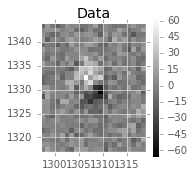

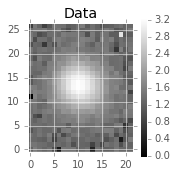

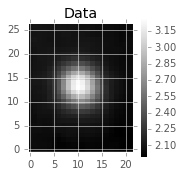

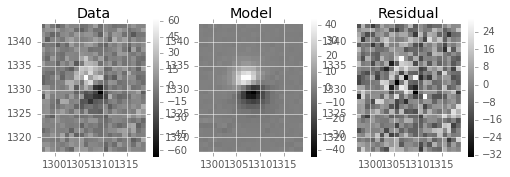

(resultsOutput(psfFitPosCentroidX=1307.2657158174711, psfFitPosCentroidY=1330.411063203819, psfFitNegCentroidX=1307.2948785371318, psfFitNegCentroidY=1330.3355089691197, psfFitPosFlux=46263.75154793121, psfFitNegFlux=-46263.75154793121, psfFitPosFluxSigma=194.37730836114085, psfFitNegFluxSigma=194.3773084700834, psfFitCentroidX=1307.2802971773015, psfFitCentroidY=1330.3732860864693, psfFitOrientation=111.10578642530841, psfFitSignaltoNoise=336.59703089133114, psfFitChi2=2603.477526861916, psfFitRedChi2=1.4675747051081827),
 <lmfit.model.ModelResult at 0x1318be090>)

In [10]:
i = 115; s = catalog[i]
i = 67; s = catalog[i]
#i = 12; s = catalog[i]
fp = s.getFootprint()
print i, fp.getBBox(), fp.getNpix(), len(fp.getPeaks())
for pk in fp.getPeaks():
    print '   FOOTPRINT CENTER:', pk.getIy(), pk.getIx(), pk.getPeakValue()
    
bbox = fp.getBBox()
subim = afwImage.ImageF(diffim.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.displayImage(subim)
subim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.plt.figure(figsize=(8, 2.5)); dft.DipoleUtils.plt.subplot(1, 3, 1)
dft.DipoleUtils.display2dArray(np.log10(subim.getArray()+20.))
subim = afwImage.ImageF(negImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
dft.DipoleUtils.plt.figure(figsize=(8, 2.5)); dft.DipoleUtils.plt.subplot(1, 3, 1)
dft.DipoleUtils.display2dArray(np.log10(subim.getArray()))

subim = afwImage.ImageF(posImage.getMaskedImage().getImage(), bbox, afwImage.PARENT)
subArr = subim.getArray()
print np.median(subArr), np.max(subArr)
psfImg = posImage.getPsf().computeImage()
pkToFlux = np.nansum(psfImg.getArray()) / posImage.getPsf().computePeak()
print pkToFlux
print np.max(subArr) * pkToFlux

result = dft.DipoleFitAlgorithm.fitDipole_new(
    diffim, s, posImage, negImage, rel_weight=1., fitBgGradient=True, separateNegParams=False,
    verbose=False, display=True, return_fitObj=True)

result